In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [10]:
# checking sklearn version
import sklearn
print(sklearn.__version__)

1.2.1


In [28]:
from sklearn.datasets import fetch_openml
# Load the Boston Housing dataset
boston = fetch_openml(name='boston', version=1)

# Access the data and target
X, y = boston.data, boston.target

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [31]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [30]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Preparing The Dataset

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [37]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [38]:
y.isnull().sum()

0

In [41]:
# checking correlation 

X.corr()

/var/folders/f3/hq7n6w7d59n_lkymzcwnbnhc0000gn/T/ipykernel_52403/1661337361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087


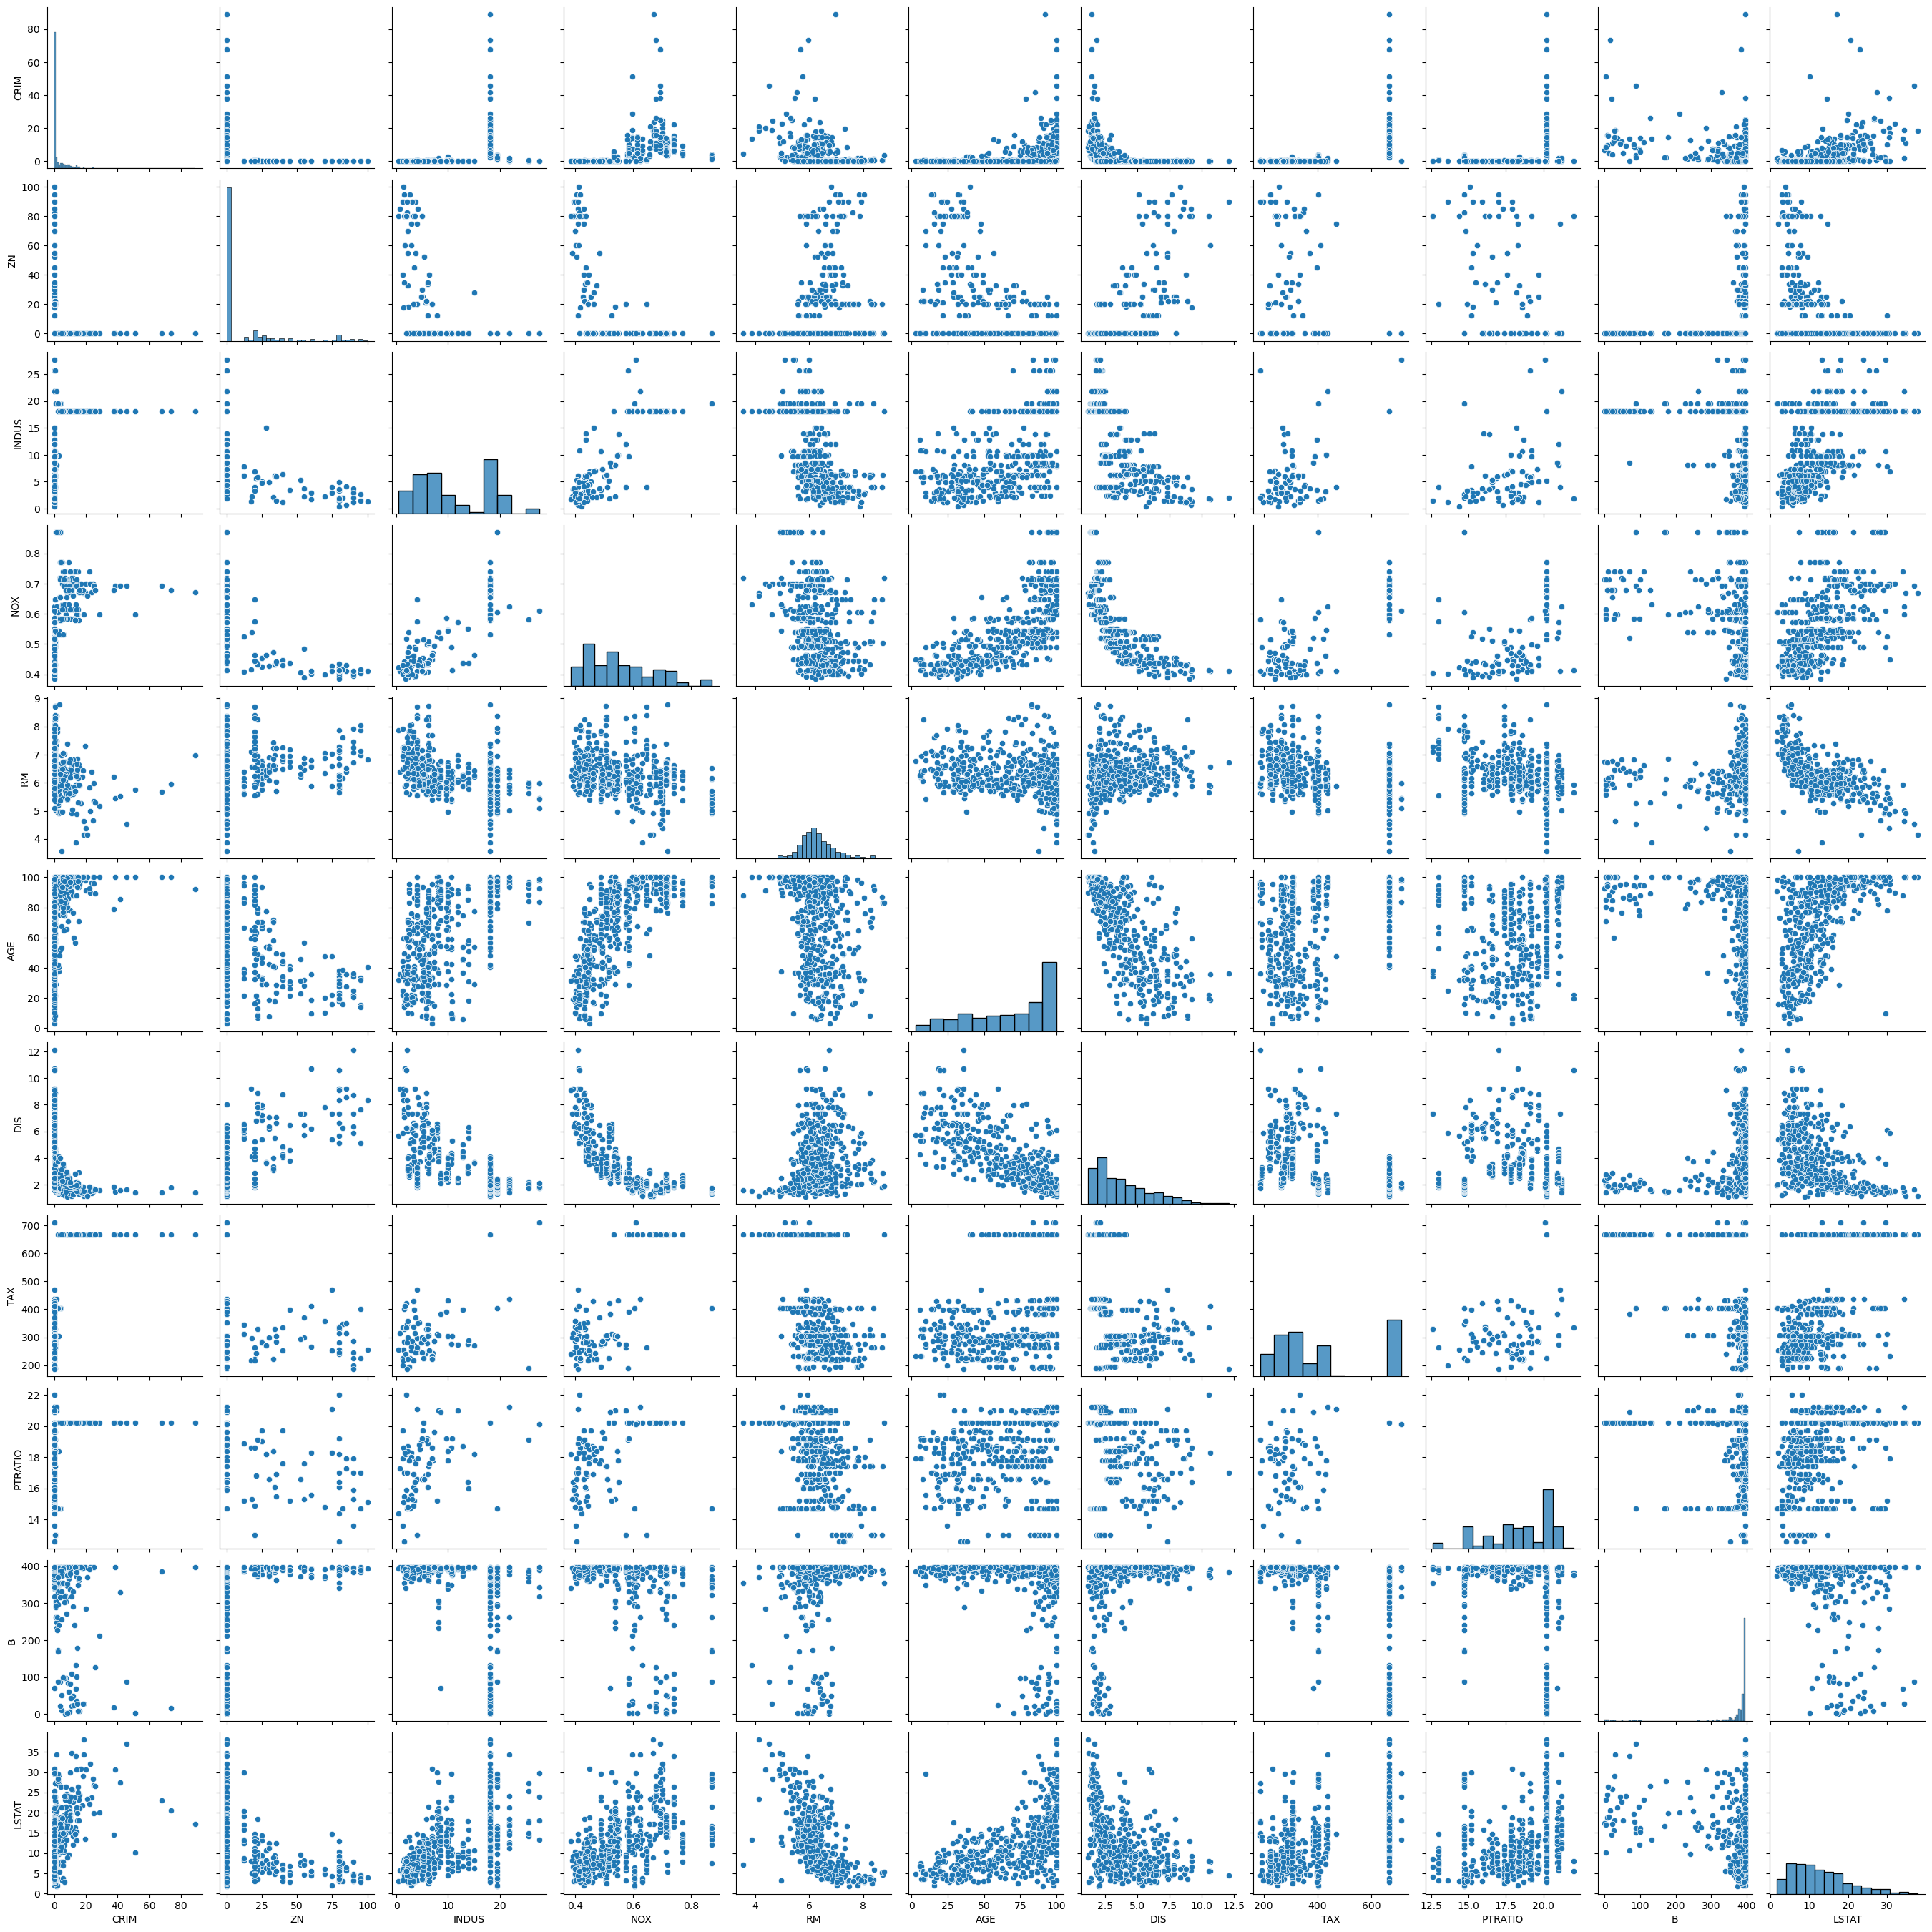

In [42]:
import seaborn as sns
sns.pairplot(X)

# Analyzing The Correlated Features

Text(0, 0.5, 'Price')

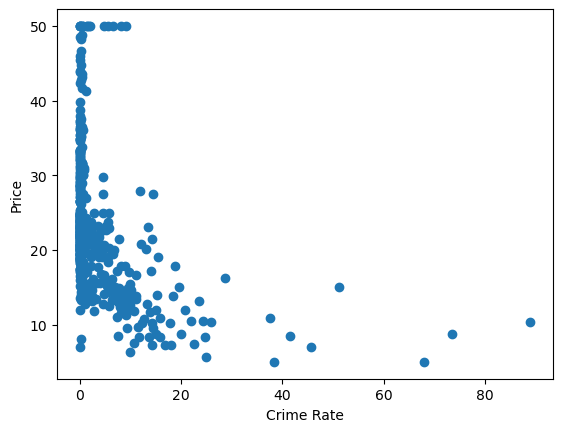

In [44]:
plt.scatter(X['CRIM'],y)
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

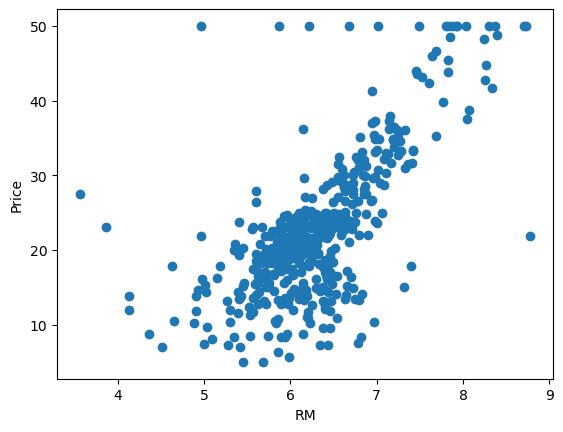

In [46]:
plt.scatter(X['RM'],y)
plt.xlabel("RM")
plt.ylabel("Price")

In [50]:
dataset = X
dataset['Price'] = y

<Axes: xlabel='RM', ylabel='Price'>

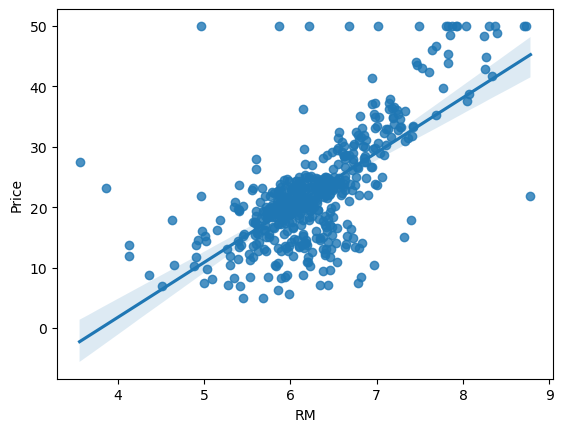

In [51]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

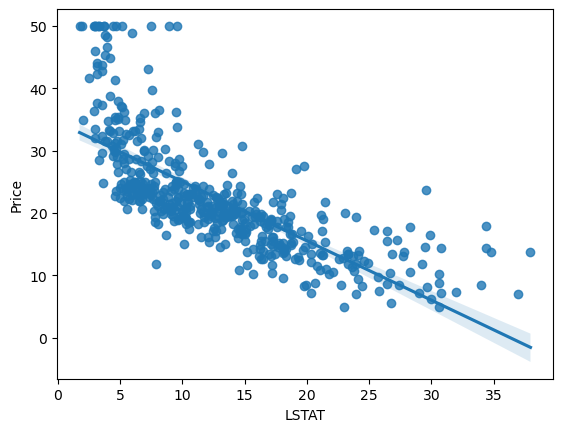

In [52]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

<Axes: xlabel='PTRATIO', ylabel='Price'>

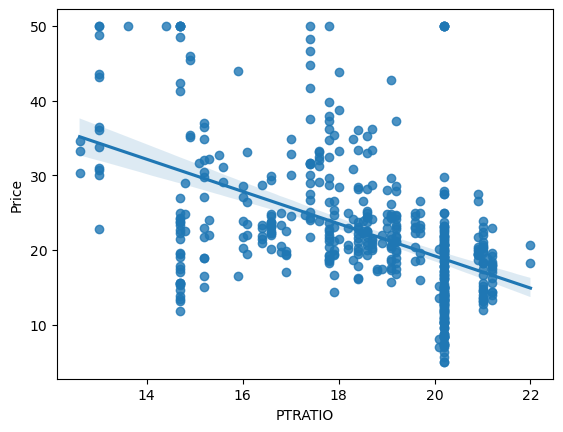

In [53]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

# Building the model

In [54]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((354, 14), (152, 14), (354,), (152,))

In [58]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Standarziding X_train and X_test
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
# Model Training 

from sklearn.linear_model import LinearRegression

In [61]:
regression=LinearRegression()

In [62]:
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
## print the coefficients and the intercept
print(regression.coef_)

[ 8.41477435e-15 -8.88178420e-16  2.86871878e-15  1.45342415e-15
  7.36143081e-15 -1.99000249e-14  2.12157077e-14 -1.94704815e-14
  1.27978003e-14  1.48659536e-14  3.78233874e-15 -6.75664197e-15
  6.77920949e-15  9.37531490e+00]


In [64]:
print(regression.intercept_)

23.01581920903955


In [65]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [66]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [67]:
reg_pred

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

# Assumptions

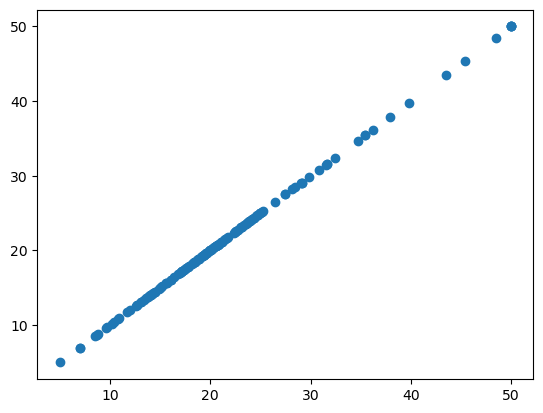

In [68]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [69]:
## Residuals
residuals=y_test-reg_pred
residuals

173    1.421085e-14
274    9.237056e-14
491   -8.881784e-14
72     9.237056e-14
452   -9.947598e-14
           ...     
441   -1.136868e-13
23    -2.842171e-14
225    9.947598e-14
433   -1.172396e-13
447   -1.154632e-13
Name: MEDV, Length: 152, dtype: float64

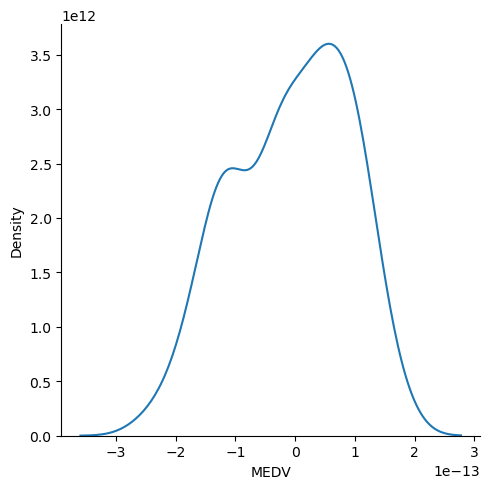

In [70]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

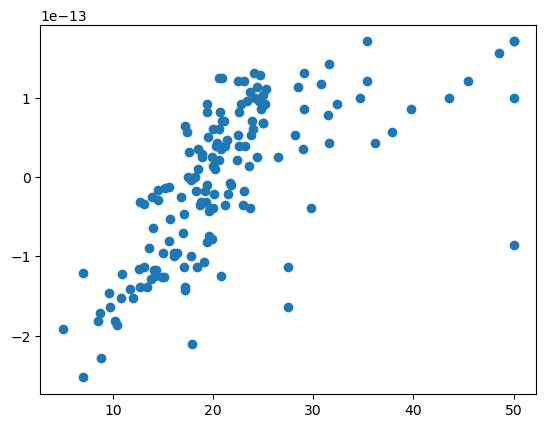

In [71]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

8.220325005487738e-14
9.506645806808437e-27
9.750202975737703e-14


In [73]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

1.0


In [74]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

1.0

In [82]:
X.values.reshape(-1,1)

array([[0.00632],
       [18.0],
       [2.31],
       ...,
       [396.9],
       [7.88],
       [11.9]], dtype=object)

In [88]:
boston.data.values[0].reshape(1,-1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98, 24.0]], dtype=object)

In [89]:
##transformation of new data
scaler.transform(boston.data.values[0].reshape(1,-1))

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976,  0.10497576]])

In [91]:
regression.predict(scaler.transform(boston.data.values[0].reshape(1,-1)))

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24.])

## Pickling The Model file For Deployment

In [93]:
import pickle

In [94]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [95]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [96]:
pickled_model.predict(scaler.transform(boston.data.values[0].reshape(1,-1)))

/Users/anubhavnehru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([24.])